# 1. Import Libraries

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

warnings.filterwarnings("ignore")

np.random.seed(123)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Read Data

In [2]:
data = pd.read_csv("alzheimer_dataset.csv")

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alzheimer


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Columns: 4097 entries, pixel_0 to label
dtypes: float64(4096), object(1)
memory usage: 160.1+ MB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
count,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,...,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = "label"
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [11]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
clf = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation="relu",
    learning_rate_init=0.0001,
    max_iter=1000,
    batch_size=X_train_scaled.shape[0],
)

## 6.2. Train Model

In [13]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(batch_size=4096, hidden_layer_sizes=(10, 5),
              learning_rate_init=0.0001, max_iter=1000)

## 6.3. Loss Curve

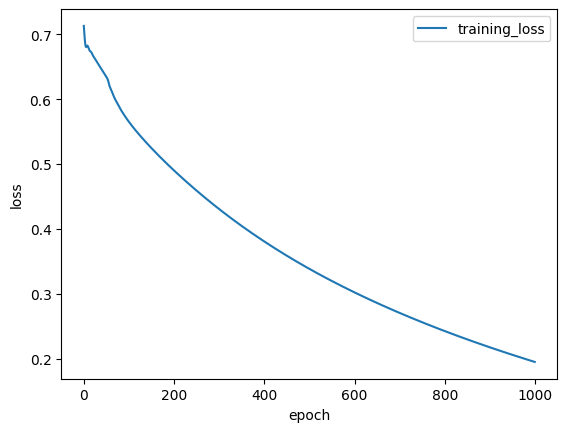

In [14]:
plt.plot(clf.loss_curve_, label="training_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

## 6.4. Model's Weight & Bias

In [15]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(4096, 10)
(10, 5)
(5, 1)


In [16]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(10,)
(5,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [17]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [18]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

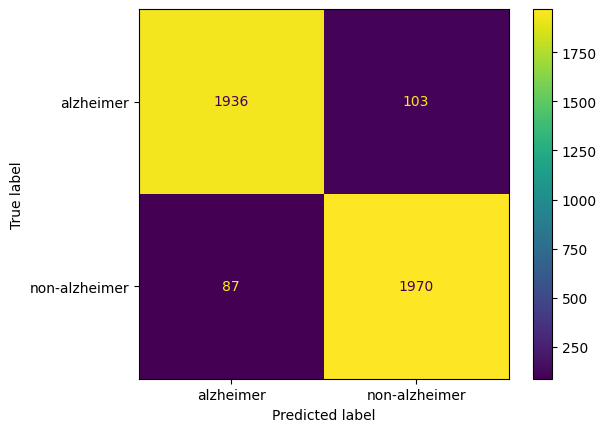

In [19]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [20]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [21]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
alzheimer,0.956995,0.949485,0.953225,2039.000000
non-alzheimer,0.950314,0.957705,0.953995,2057.000000
accuracy,0.953613,0.953613,0.953613,0.953613
macro avg,0.953654,0.953595,0.953610,4096.000000
weighted avg,0.953639,0.953613,0.953612,4096.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

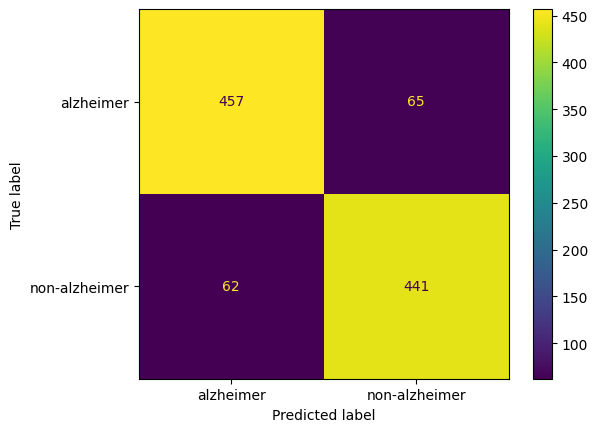

In [22]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [23]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
alzheimer,0.880539,0.875479,0.878002,522.000000
non-alzheimer,0.871542,0.876740,0.874133,503.000000
accuracy,0.876098,0.876098,0.876098,0.876098
macro avg,0.876041,0.876109,0.876067,1025.000000
weighted avg,0.876124,0.876098,0.876103,1025.000000


# 9. Save Model

In [25]:
import pickle

In [26]:
pickle.dump((clf, scaler), open("alzheimer_model.pickle", "wb"))